# DMC - Exploration

## Problem
- Both continious and descrete data  

**Two interpretations possible:**

- Binary classification problem: Buy / Not buy (Multiplication with price)
    - May be more exact than the other approach.        
        
- Regression problem: Estimate the revenue of a product based on regression
    - When on averge identical error, may be favored as it should have reduced outlier.

**Evaluation allowes for both and favors small deviations!**  
Not important for preprocessing. However, both approaches should be tested!

## General characteristics

In [1]:
options(warn = -1)
setwd("C:/Users/manuf/OneDrive/Project Datascience/R/DMC_2017_task")
train = read.csv("train.csv", sep = "|", header = TRUE, dec = ".")
class = read.csv("class.csv", sep = "|", header = TRUE, dec = ".")

factors = c("lineID","pid","adFlag","availability","click","")

summary(train)

     lineID             day             pid            adFlag      
 Min.   :      1   Min.   : 1.00   Min.   :    1   Min.   :0.0000  
 1st Qu.: 689002   1st Qu.:31.00   1st Qu.: 4313   1st Qu.:0.0000  
 Median :1378002   Median :50.00   Median :10077   Median :0.0000  
 Mean   :1378002   Mean   :49.92   Mean   :10448   Mean   :0.3178  
 3rd Qu.:2067003   3rd Qu.:71.00   3rd Qu.:16144   3rd Qu.:1.0000  
 Max.   :2756003   Max.   :92.00   Max.   :22035   Max.   :1.0000  
                                                                   
  availability   competitorPrice      click            basket      
 Min.   :1.000   Min.   :  0.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.000   1st Qu.:  5.48   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.000   Median :  8.99   Median :1.0000   Median :0.0000  
 Mean   :1.111   Mean   : 12.77   Mean   :0.5743   Mean   :0.1698  
 3rd Qu.:1.000   3rd Qu.: 15.06   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :4.000   Max.   :264.59   Max.   :1.0000

In [2]:
summary(class)

     lineID             day             pid            adFlag      
 Min.   :      1   Min.   : 93.0   Min.   :    1   Min.   :0.0000  
 1st Qu.: 302693   1st Qu.:101.0   1st Qu.: 4145   1st Qu.:0.0000  
 Median : 605384   Median :108.0   Median : 9647   Median :0.0000  
 Mean   : 605384   Mean   :108.1   Mean   :10264   Mean   :0.3339  
 3rd Qu.: 908076   3rd Qu.:116.0   3rd Qu.:15928   3rd Qu.:1.0000  
 Max.   :1210767   Max.   :123.0   Max.   :22035   Max.   :1.0000  
                                                                   
  availability   competitorPrice      price       
 Min.   :1.000   Min.   :  0.00   Min.   :  0.01  
 1st Qu.:1.000   1st Qu.:  5.37   1st Qu.:  5.84  
 Median :1.000   Median :  8.57   Median :  9.79  
 Mean   :1.107   Mean   : 12.20   Mean   : 13.47  
 3rd Qu.:1.000   3rd Qu.: 14.29   3rd Qu.: 16.45  
 Max.   :4.000   Max.   :219.37   Max.   :384.71  
                 NA's   :38005                    

### Findings:
**Unbalanced data**  
order mean of 0.2558 -> Unbalanced 3:1 (75/25)

**Increase in sales over time**
Median of day is 50 instead of 45, size of class is more than size(train)/3

**structual differences in train & class**  
No structual differences visible. Seemingly consistent.

**distribution functions**
 
**Right Skewed (median > mean)**  
1. Price
    - Large amount of cheap products  
+ adFlag
    - Most of the customers reach the site without advertising  
+ availabiltiy
    - The vast majority of products are classified as available 1 at the time of interest.  

**Missing value**  
We generally see that only the attribute "competitorPrice" has missing values
Lets see if we can assume a missing at random

## Change in pricing per product

TODO


## Missing Values

Analysing the nature of missing values in "competitor price".   
### MISSING COMPLETELY AT RANDOM? 

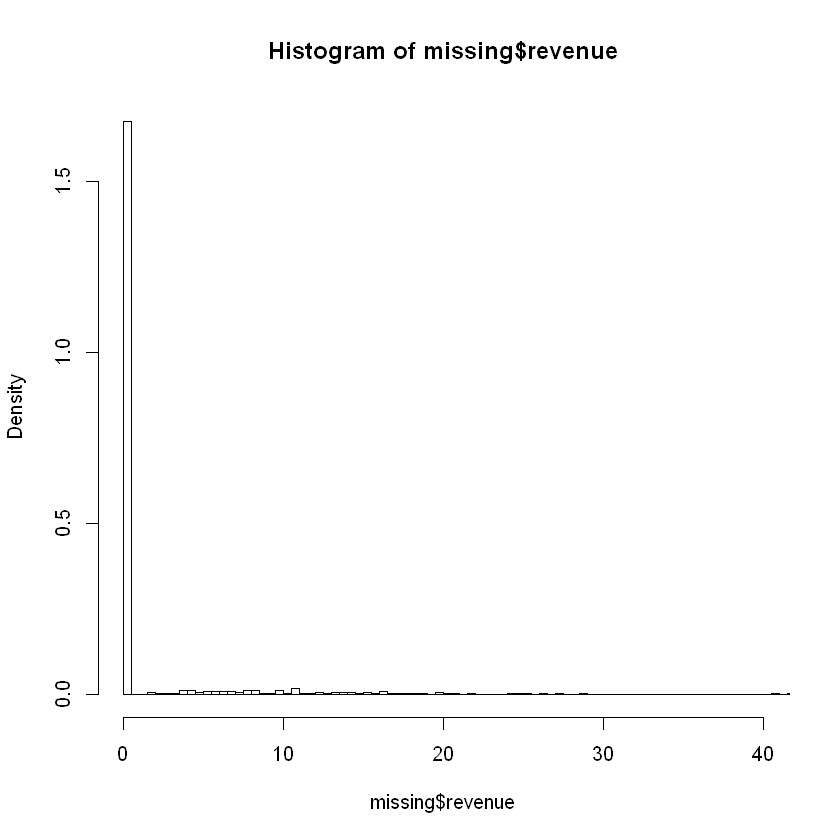

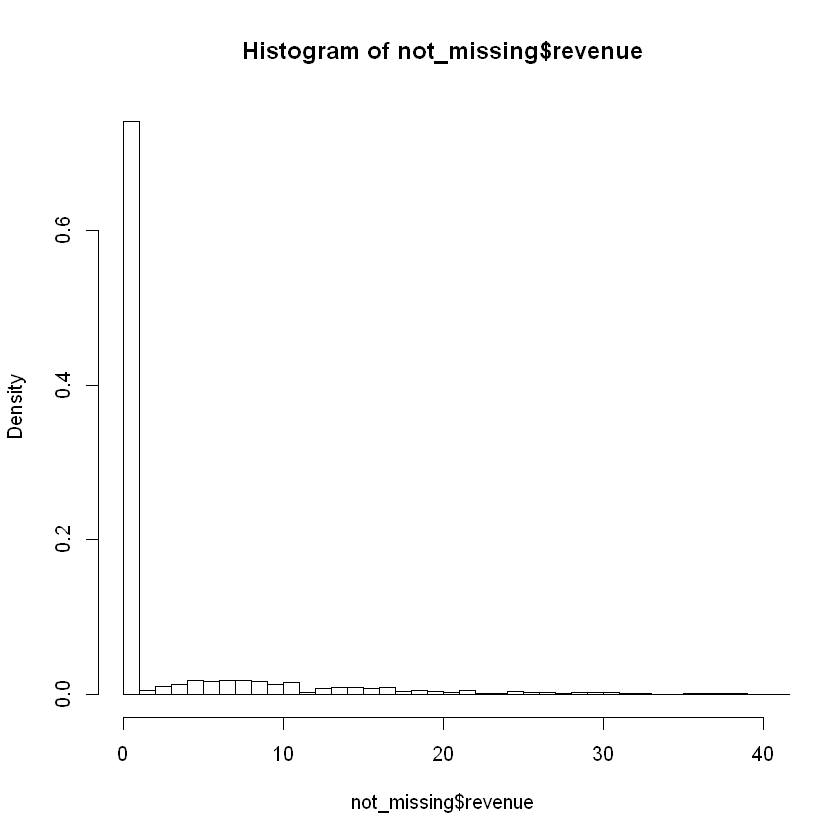

In [9]:
#Missing values in Job, EducaTION; Outcome
missing = train[is.na(train["competitorPrice"]),]
not_missing = train[!is.na(train["competitorPrice"]),]

hist(missing$revenue, breaks = 1000, freq = FALSE, xlim = c(0,40))
hist(not_missing$revenue, breaks = 1000, freq = FALSE, xlim = c(0,40))

**Difficult to spot, therefore lets try to test**

**H0**: Average revenue of both subsets is equal  
**H1**: Average revenue of btoh subsets differ

In [4]:
#testing for statistical significance
t.test(missing$revenue, not_missing$revenue)

#remove from memory


	Welch Two Sample t-test

data:  missing$revenue and not_missing$revenue
t = -26.755, df = 108410, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9465741 -0.8173549
sample estimates:
mean of x mean of y 
 2.901236  3.783201 


**->** NOT MCAR

However, they seem to have less significance to the overall revenue.

### MAR OR MNAR
**time specific?**

In [15]:
summary(missing$day)
summary(not_missing$day)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   31.00   50.00   49.97   71.00   92.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   31.00   50.00   49.92   71.00   92.00 

-> Seemingly time unspecific

**unit unspecific?**

In [13]:
library(sqldf)
items_missing = "select distinct pid from missing"
items_nmissing = "select distinct pid from not_missing"

#get items that occur in missing
missing_total =  nrow(sqldf("select distinct pid from missing"))

#Get the items that occur both in missing and not missing
missing_both = nrow(sqldf(paste("select t1.pid from (", items_missing, ") as t1 JOIN (", items_nmissing,") as t2 on t1.pid = t2.pid")))

missing_only = missing_total - missing_both

data.frame(NR_ITEMS = c(missing_total, missing_both, missing_only), row.names = c("MISSING TOTAL", "MISSING BOTH", "MISSING ONLY"))

,NR_ITEMS
MISSING TOTAL,2866
MISSING BOTH,722
MISSING ONLY,2144


-> Seemingly mostly unit specific ratio(4:1)  
-> **MISSING AT RANDOM**


In [ ]:
#Clean-up
rm(missing, not_missing)

### ABC analysis

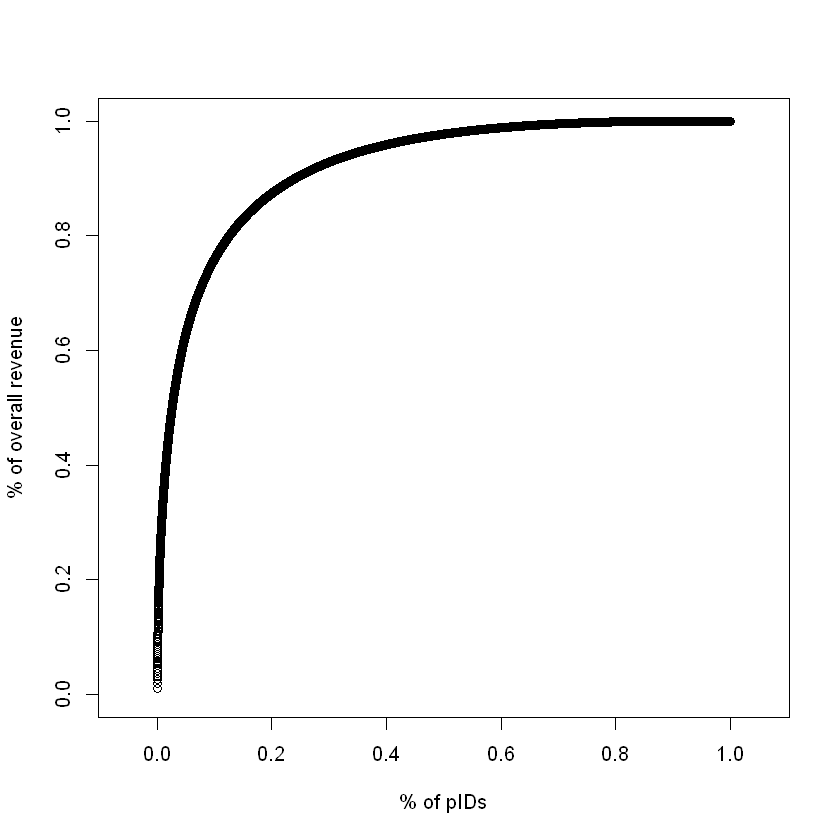

In [18]:
#General sql statement for data generation
abc = sqldf("select *
      from (select pid, count(pid), sum(revenue) as sumrevenue, avg(revenue) from train group by pid) as t1
      order by sumrevenue desc")

#ABC analysis revenue
#generate cummulated sum
cs_rev = cumsum(abc$sumrevenue)

#normalize the y axis
norm_cs_rev = cs_rev/sum(abc$sumrevenue)

#Plot the
plot(c(1:nrow(abc))/nrow(abc), norm_cs_rev, xlim = c(0, 1), ylim = c(0, 1), xlab = "% of pIDs", ylab = "% of overall revenue", asp = 1)

In [ ]:
#Cleaning up our code
rm(cs_rev, norm_cs_rev)
options(warn = 0)

# DMC - Preprocessing



## Feature engineering 

** Most important aspects for a buying decision**
### Price of the product

**We have:**
- Offered price
- Competitor price

**Potentially relevant:**
- % price difference to competitor
- total price difference to competitor

### Price expectation

**We have:**
/

**Potentially relevant:**
- % price difference to historic low
- total price difference to historic low
- trend (upwards, downwards, neutral)

### Demand

**We have:**
/

**potentially relevant:**
- % availability over time
- Overall demand for this product in this week / month
- Demand trend (upwards, downwards, neutral)
- Weekdays
- Month


### Missing values

**Possible actions:**  
Ignoring Instances: Not possible, as the class file also contains missing values
Ignoring Attribute: Bad
Stratified imputation / regression imputation. Bad, as most missing values are item dependent.

**Possiblilities:**  
Binning and dummy coding
General imputation
Choosing a classification algorithm that can handle missing data

no golden path?

### Fixed Effects analysis

account for time fixed effects (per day / week / month)
Panel data
Trend component (for each product)
Saisonal component
Cyclic component


### Sampling
Unbalanced dataset -> equal out number of observations in each label?
Increase in sales -> equal out number of observations in each periode?